<a href="https://colab.research.google.com/github/ppdevexe/ml-projects/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000) 

In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy'
              ,metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.7099 - accuracy: 0.5293 - val_loss: 1.8188 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.4549 - accuracy: 0.6968 - val_loss: 1.3284 - val_accuracy: 0.6970
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.0595 - accuracy: 0.7732 - val_loss: 1.1310 - val_accuracy: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.8326 - accuracy: 0.8274 - val_loss: 1.0315 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.6641 - accuracy: 0.8634 - val_loss: 1.0042 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.5351 - accuracy: 0.8876 - val_loss: 0.9250 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss:

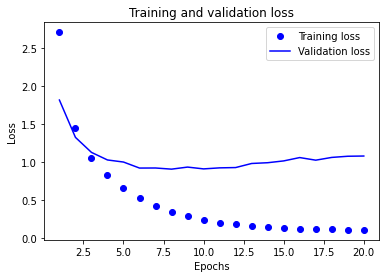

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history_dict=history.history
history_dict

{'accuracy': [0.52931595,
  0.6968178,
  0.7732398,
  0.8273616,
  0.8634427,
  0.8876222,
  0.9091706,
  0.9210724,
  0.9377349,
  0.9436231,
  0.9478827,
  0.9516412,
  0.9536457,
  0.95314455,
  0.95615137,
  0.95665246,
  0.9575294,
  0.9579053,
  0.9565272,
  0.95740414],
 'loss': [2.7098628759563375,
  1.4549261476724138,
  1.059543227901497,
  0.8325665342691279,
  0.6641044808610942,
  0.5350720891227283,
  0.4317961608189683,
  0.35316851822483425,
  0.28899568529900854,
  0.2425636247498623,
  0.2092343485615242,
  0.18841397865721826,
  0.16309192112456344,
  0.1521483704959262,
  0.13629055504466142,
  0.13039538291157174,
  0.12140316635079026,
  0.11962445134792193,
  0.11392365891110237,
  0.11224985769542647],
 'val_accuracy': [0.6349999904632568,
  0.6970000267028809,
  0.7630000114440918,
  0.7860000133514404,
  0.7979999780654907,
  0.8050000071525574,
  0.8069999814033508,
  0.8090000152587891,
  0.7919999957084656,
  0.8059999942779541,
  0.8100000023841858,
  0.80

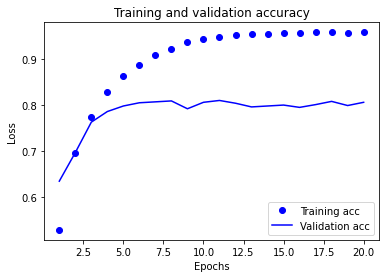

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 176us/step - loss: 2.5314 - accuracy: 0.5170 - val_loss: 1.6688 - val_accuracy: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.3729 - accuracy: 0.6946 - val_loss: 1.2747 - val_accuracy: 0.7150
Epoch 3/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.0234 - accuracy: 0.7731 - val_loss: 1.1231 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.8121 - accuracy: 0.8240 - val_loss: 1.0276 - val_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.6485 - accuracy: 0.8632 - val_loss: 0.9738 - val_accuracy: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.5151 - accuracy: 0.8898 - val_loss: 0.9331 - val_accuracy: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.415

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy'
              metrics=['accuracy'])

SyntaxError: ignored